In [30]:
import numpy as np
import pandas as pd
import cv2
import os
import shutil
from glob import glob
import matplotlib.pyplot as plt

In [16]:
same_percentage_csv = pd.read_csv('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/11thJan2024/onco_sg_cell_same_11thJan_percentage.csv')
same_percentage_csv__sorted = same_percentage_csv.sort_values(by='Percentage')
top_5_patients_same = list(same_percentage_csv__sorted[-1::-1]['Patient Name'][:5])

['A162', 'A196', 'A163', 'A263', 'A143']

In [49]:
count = 1

for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/11thJan2024/Same'):

    if folder in top_5_patients_same:

        file_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/11thJan2024/Same', folder)

        new_onco_dir = '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Onco_sg_selection_15thJan/Onco_' + str(count)
        
        os.makedirs(new_onco_dir, exist_ok =True)

        shutil.copy2(file_path + '/' + os.listdir(file_path)[0], new_onco_dir + '/' + os.listdir(file_path)[0][:-4] + '_Same' + os.listdir(file_path)[0][-4:])

        count = count + 1



count = 1

for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/11thJan2024/Serial'):

    if folder in top_5_patients_same:

        file_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/11thJan2024/Serial', folder)

        new_onco_dir = '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Onco_sg_selection_15thJan/Onco_' + str(count)
        
        os.makedirs(new_onco_dir, exist_ok =True)

        shutil.copy2(file_path + '/' + os.listdir(file_path)[0],  new_onco_dir + '/' + os.listdir(file_path)[0][:-4] + '_Serial' + os.listdir(file_path)[0][-4:])

        count = count + 1



count = 1

image_path = r'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/onco_sg/H&E images_retiled_png/TCR.ID'

for folder in os.listdir(image_path):

    if folder in top_5_patients_same:

        image_file = os.path.join(image_path, folder)

        new_onco_dir = '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Onco_sg_selection_15thJan/Onco_' + str(count)

        os.makedirs(new_onco_dir, exist_ok =True)

        for img in os.listdir(image_file):

            if '20x.jpg' in img:

                shutil.copy2(image_file + '/' + img,  new_onco_dir + '/' + os.listdir(image_file)[0][:-4] + os.listdir(image_file)[0][-4:])

        count = count + 1





['A163, solid, 20x.jpg', 'A163, solid, 5x.jpg']
['A196, acinar, 20x.jpg', 'A196, acinar, 5x.jpg']
['A162, acinar, 20x.jpg', 'A162, acinar, 5x.jpg']
['A143, solid, 20x.jpg', 'A143, solid, 5x.jpg']
['A263, papillary, 5x.jpg', 'A263, papillary, 20x.jpg']


In [60]:
for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Onco_sg_selection_15thJan'):

    folder_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Onco_sg_selection_15thJan', folder)

    onco_sg_he=sorted(glob(folder_path + "/*"))

    imga=cv2.imread(onco_sg_he[0])
    imgy=imga[:][25:imga.shape[0]-35] #TO REMOVE SOME TEXT ON TOP AND BOTTOM
    img=cv2.resize(imgy,(1792,768)) #TO GET ALL 256X256 TILES

    img_same=np.load(onco_sg_he[1])
    img_serial=np.load(onco_sg_he[2])

    kernel1 = np.ones((9,9),np.uint8)
    kernel2 = np.ones((5,5),np.uint8)
    gradient1 = cv2.morphologyEx(np.array(255*(img_same>0),np.uint8), cv2.MORPH_GRADIENT, kernel1)
    gradient2 = cv2.morphologyEx(np.array(255*(img_serial>0),np.uint8), cv2.MORPH_GRADIENT, kernel1)
    gradient1 = cv2.morphologyEx(gradient1, cv2.MORPH_GRADIENT, kernel2)
    gradient2 = cv2.morphologyEx(gradient2, cv2.MORPH_GRADIENT, kernel2)
    merge1=cv2.merge([np.zeros_like(gradient1),gradient1,np.zeros_like(gradient1)])
    merge2=cv2.merge([np.zeros_like(gradient2),gradient2,np.zeros_like(gradient2)])

    result1=cv2.addWeighted(img,0.8,merge1,1,0)
    result2=cv2.addWeighted(img,0.8,merge2,1,0)

    cv2.imwrite(folder_path + "/same.png",result1)
    cv2.imwrite(folder_path + "/serial.png",result2)


In [163]:
data = pd.read_csv('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/Validation_Same_section_2024_results.csv')
top_5_val = data[abs((data['GT_CD3P'].astype('int')) - (data['Pred_CD3P'].astype('int')))<1230]
imp_data = list(top_5_val[top_5_val['Pred_CD3P'].astype('int')>1600]['name'])
top_5_val = imp_data

In [164]:
count = 1

for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3P'):

    if folder in top_5_val:

        npy_file_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3P', folder)

        new_val_dir = '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/' + 'Val_' + str(count)
        
        os.makedirs(new_val_dir, exist_ok= True)

        shutil.copy2(npy_file_path, new_val_dir + '/' + 'Same_' + folder)
        
        count = count + 1

count = 1

for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P'):

    if folder in top_5_val:

        npy_file_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P', folder)

        new_val_dir = '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/' + 'Val_' + str(count)
        
        os.makedirs(new_val_dir, exist_ok= True)

        shutil.copy2(npy_file_path, new_val_dir + '/' + 'Serial_' + folder)
        
        count = count + 1
        

for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/IHC_TIFF_Cropped_and_correct'):

    for val_folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan'):

        if folder[:3] in os.listdir(os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', val_folder))[-1]:

           shutil.copy2((os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/IHC_TIFF_Cropped_and_correct/'+ folder)), (os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', val_folder) + '/' + 'IHC_' + folder))


for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/H&E_TIFF_Cropped'):

    for val_folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan'):

        if folder[-6:-4] in os.listdir(os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', val_folder))[-1][-6:]:

           shutil.copy2((os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/H&E_TIFF_Cropped/'+folder)), (os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', val_folder) + '/' + folder))


for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei'):

    for val_folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan'):

        if folder[-6:-4] in os.listdir(os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', val_folder))[-1][-6:]:

           shutil.copy2((os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/'+ folder)), (os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', val_folder) + '/' + 'GT_' + folder))

In [165]:
for folder in os.listdir('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan'):

    folder_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', folder)

    ihc_val_he=sorted(glob(folder_path + "/*"))

    img=cv2.imread(ihc_val_he[1])

    i_same=np.array(255*(img_same>0),np.uint8)
    i_serial=np.array(255*(img_serial>0),np.uint8)
    merge1=cv2.merge([i_same,np.zeros_like(i_same),i_same])
    merge2=cv2.merge([i_serial,i_serial,np.zeros_like(i_same)])

    img_same=np.load(ihc_val_he[-2])
    img_serial=np.load(ihc_val_he[-1])
    gt=np.load(ihc_val_he[0])
    kernel1 = np.ones((9,9),np.uint8)
    kernel2 = np.ones((5,5),np.uint8)
    gradient1 = cv2.morphologyEx(np.array(255*(img_same>0),np.uint8), cv2.MORPH_GRADIENT, kernel2)
    gradient2 = cv2.morphologyEx(np.array(255*(img_serial>0),np.uint8), cv2.MORPH_GRADIENT, kernel2)
    gradient3 = cv2.morphologyEx(np.array(255*(gt>0),np.uint8), cv2.MORPH_GRADIENT, kernel2)
    #gradient1 = cv2.morphologyEx(gradient1, cv2.MORPH_GRADIENT, kernel2)
    #gradient2 = cv2.morphologyEx(gradient2, cv2.MORPH_GRADIENT, kernel2)
    #gradient3 = cv2.morphologyEx(gradient3, cv2.MORPH_GRADIENT, kernel2)
    merge1=cv2.merge([np.zeros_like(gradient1),gradient1,np.zeros_like(gradient1)])
    merge2=cv2.merge([np.zeros_like(gradient2),gradient2,np.zeros_like(gradient2)])
    merge3=cv2.merge([np.zeros_like(gradient3),gradient3,np.zeros_like(gradient3)])

    result1=cv2.addWeighted(img,0.8,merge1,1,0)
    result2=cv2.addWeighted(img,0.8,merge2,1,0)
    result3=cv2.addWeighted(img,0.8,merge3,1,0)

    cv2.imwrite(folder_path + "/same.png",result1)
    cv2.imwrite(folder_path + "/serial.png",result2)
    cv2.imwrite(folder_path + "/gt.png",result3)

    


In [146]:
img.shape

(5412, 5247, 3)

In [131]:
folder_path = os.path.join('/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan', folder)

ihc_val_he=sorted(glob(folder_path + "/*"))

ihc_val_he

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4/GT_034.npy',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4/H&E_TIFF_s35.tif',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4/IHC_035.tif',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4/Same_034.npy',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4/Serial_034.npy',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4/gt.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_

In [132]:
#Applies CD3+ boundaries on selected images
ihc_val_he=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/*"))

ihc_val_he

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_1',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_2',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_3',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_4',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/Val_5']

TypeError: Image data of dtype object cannot be converted to float

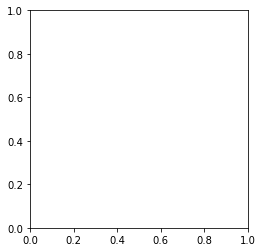

In [133]:
img=cv2.imread(ihc_val_he[-1])
plt.imshow(img)

In [45]:

i_same=np.array(255*(img_same>0),np.uint8)
i_serial=np.array(255*(img_serial>0),np.uint8)
merge1=cv2.merge([i_same,np.zeros_like(i_same),i_same])
merge2=cv2.merge([i_serial,i_serial,np.zeros_like(i_same)])

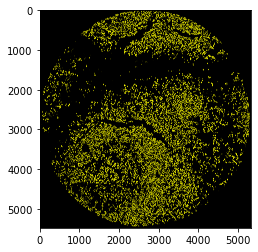

In [46]:
plt.imshow(merge2)

In [63]:
#Onco-SG H&E (.png), same and serial section predictions (.npy), ground truth (.npy)

img_same=np.load(ihc_val_he[1])
img_serial=np.load(ihc_val_he[2])
gt=np.load(ihc_val_he[0])
kernel1 = np.ones((9,9),np.uint8)
kernel2 = np.ones((5,5),np.uint8)
gradient1 = cv2.morphologyEx(np.array(255*(img_same>0),np.uint8), cv2.MORPH_GRADIENT, kernel2)
gradient2 = cv2.morphologyEx(np.array(255*(img_serial>0),np.uint8), cv2.MORPH_GRADIENT, kernel2)
gradient3 = cv2.morphologyEx(np.array(255*(gt>0),np.uint8), cv2.MORPH_GRADIENT, kernel2)
#gradient1 = cv2.morphologyEx(gradient1, cv2.MORPH_GRADIENT, kernel2)
#gradient2 = cv2.morphologyEx(gradient2, cv2.MORPH_GRADIENT, kernel2)
#gradient3 = cv2.morphologyEx(gradient3, cv2.MORPH_GRADIENT, kernel2)
merge1=cv2.merge([np.zeros_like(gradient1),gradient1,np.zeros_like(gradient1)])
merge2=cv2.merge([np.zeros_like(gradient2),gradient2,np.zeros_like(gradient2)])
merge3=cv2.merge([np.zeros_like(gradient3),gradient3,np.zeros_like(gradient3)])

result1=cv2.addWeighted(img,0.8,merge1,1,0)
result2=cv2.addWeighted(img,0.8,merge2,1,0)
result3=cv2.addWeighted(img,0.8,merge3,1,0)

cv2.imwrite("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/same.png",result1)
cv2.imwrite("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/serial.png",result2)
cv2.imwrite("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Images_for_articles/Validation_selection_15thJan/gt.png",result3)

True

In [55]:
img.shape

(5478, 5225, 3)

In [56]:
merge2.shape

(5478, 5313, 3)